In [ ]:
# TODO
# Specify batch size
# Data augmentation


In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.vision.models.xresnet import xresnet50

import pandas as pd

In [3]:
images_path = '../data/resized_images'
labels_path = '../data/resized_labels.csv'
target_size = 320

In [5]:
y = pd.read_csv(labels_path, index_col='filename')

In [22]:
def get_y_func(x):
    filename = str(x).split('/')[-1]
    zipped = zip(list(y.loc[filename])[0::2], list(y.loc[filename])[1::2])
    return tensor(list(zipped))

pet_block = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y = lambda x: get_y_func(x),
    splitter=RandomSplitter()
)

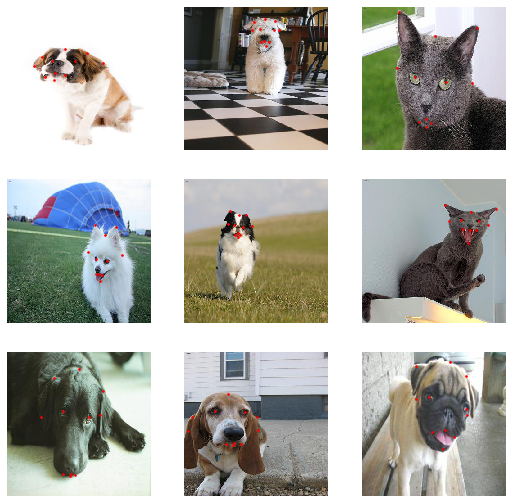

In [26]:
pet_dataloaders = pet_block.dataloaders(
    images_path, 
    batch_tfms=[
        *aug_transforms(size=(320,320)), 
        Normalize.from_stats(*imagenet_stats)
    ]
)
pet_dataloaders.show_batch(max_n=9, vmin=1, vmax=30)

In [27]:
pet_dataloaders.c = pet_dataloaders.after_item.c
pet_dataloaders.train_ds.loss_func = MSELossFlat()

In [28]:
learn = cnn_learner(pet_dataloaders, xresnet50)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /Users/HenryDashwood/.cache/torch/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [00:35<00:00, 7.29MB/s] 


In [30]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3)

In [ ]:
learn.predict(pet_dataloaders.train_ds.items[0])

In [ ]:
learn.show_results(max_n=4)